# Cargando librerias

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

# Exploración de datos 

In [9]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [5]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


## Datos númericos

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


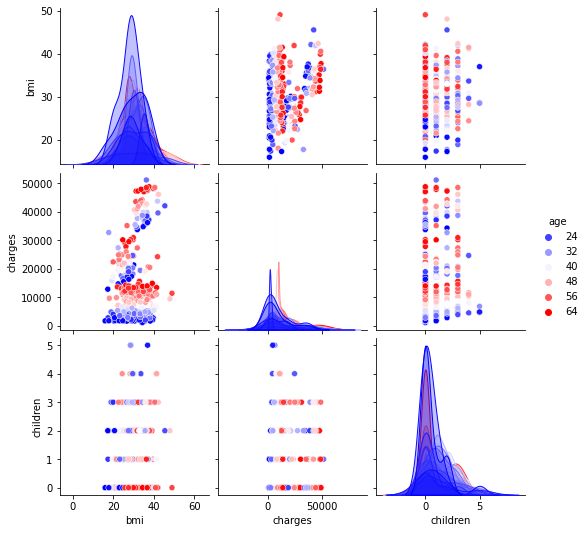

In [6]:
sns.pairplot(data = df[["age", "bmi", "charges","children"]], hue ='age', palette ='bwr' )

## Datos no númericos

(array([171.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 177.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

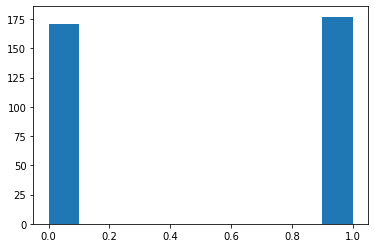

In [7]:
plt.hist(df["sex"])

(array([150.,   0.,  82.,   0.,  63.,   0.,  43.,   0.,   7.,   3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

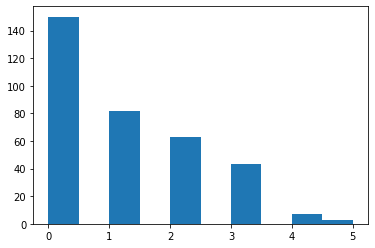

In [8]:
plt.hist(df["children"])

(array([267.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  81.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

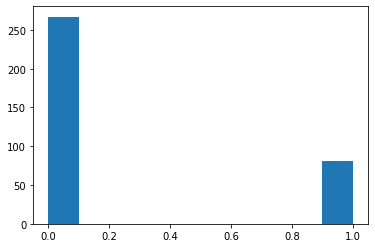

In [9]:
plt.hist(df["smoker"])

(array([86.,  0.,  0., 85.,  0.,  0., 95.,  0.,  0., 82.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

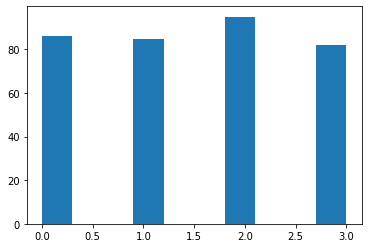

In [10]:
plt.hist(df["region"])

# Preparación de los datos

Afortunadamente como se puede ver en la exploracion de los datos el data set no tiene datos nulos 

In [10]:
le = preprocessing.LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Dividir en training y test

In [11]:
X = df[['age','sex','bmi','children','smoker','region']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33)
X_train.head()

,age,sex,bmi,children,smoker,region
153,42,0,23.370,0,1,0
40,24,0,26.600,0,0,0
169,27,1,18.905,3,0,0
156,48,1,24.420,0,1,2
160,42,0,26.600,0,1,1


# Preparación de los datos - escala

In [6]:
standard_scaler = preprocessing.StandardScaler()
X_train[['age','sex','bmi','children','smoker','region']] = standard_scaler.fit_transform(X_train[['age','sex','bmi','children','smoker','region']])
X_train.head()

<ipython-input-6-39ccaba645b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['age','sex','bmi','children','smoker','region']] = standard_scaler.fit_transform(X_train[['age','sex','bmi','children','smoker','region']])
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,sex,bmi,children,smoker,region
102,-1.457189,-1.057441,-0.105087,-0.942362,-0.522708,-1.360006
272,0.124877,0.945679,1.182974,0.773031,-0.522708,-0.454630
287,1.638157,-1.057441,-0.828518,-0.942362,-0.522708,-0.454630
326,-0.838120,-1.057441,-1.387575,-0.084665,-0.522708,0.450745
308,1.294229,0.945679,0.777147,-0.942362,-0.522708,-1.360006


# OLS propio

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error

In [47]:
class OLS():
        def __init__(self, x,y):
                self.x = x
                self.y = y
            
        def fit(self, intercept = False):
            self.intercept = intercept
            x = np.hstack([np.ones(len(self.x))[:, np.newaxis], self.x]) if self.intercept else self.x
            y = self.y
            self.betas = np.linalg.inv(x.T @ x) @ x.T @ self.y
        def predict(self):
            x = np.hstack([np.ones(len(self.x))[:, np.newaxis], self.x])if self.intercept else self.x
            self.y_hat = x @ self.betas
            return self.y_hat
        def plot_predictions(self):
            plt.scatter(self.x, self.y, c='orange', label = 'Observed values')
            plt.plot(self.x, self.y_hat, label = 'Fitted values')
            plt.legend()
            title_label = 'Fitted OLS Regression: intercept={}, slope={}'.format(np.round(self.betas[0],2), np.round(self.betas[0],2))
            plt.title(label=title_label)
            plt.show()

[2012.43623469]


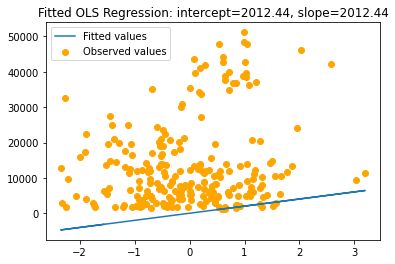

MAE 15474.004054091365
MSE 421474372.5818521


In [60]:
ols = OLS(X_train['bmi'].to_numpy().reshape(-1,1),y_train.to_numpy())
ols.fit()
print(ols.betas)
pred=ols.predict()
ols.plot_predictions()
print("MAE", mean_absolute_error(y_test,pred[0:115] ))
print("MSE", mean_squared_error(y_test,pred[0:115] ))

# OLS de libreria solo con bmi

In [6]:
from sklearn.linear_model import LinearRegression

2012.4362346854657
MAE 59226.506339416854
MSE 3722369979.891629


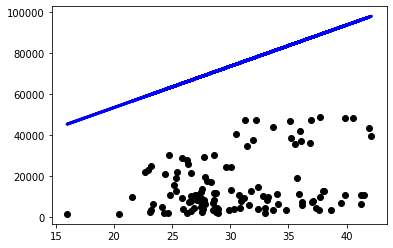

In [55]:
lregression_model = LinearRegression()
lregression_model.fit(X_train['bmi'].to_numpy().reshape(-1,1), y_train)
coefs = lregression_model.coef_
for i in coefs: print(i)
y_pred=lregression_model.predict(X_test['bmi'].to_numpy().reshape(-1,1))
plt.scatter(X_test['bmi'].to_numpy(), y_test,  color='black')
plt.plot(X_test['bmi'].to_numpy(), y_pred, color='blue', linewidth=3)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

# OLS con todas las variables

In [16]:
lregression_model = LinearRegression()
lregression_model.fit(X_train, y_train)
coefs = lregression_model.coef_
for i in coefs: print(i)
y_pred=lregression_model.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

276.256070063665
26.47011861389288
278.4204470776474
423.8349115266742
23078.92779480512
-105.54837329565545
MAE 4446.111806011322
MSE 34489559.42527061


# Regresión Polinomial

In [1]:
from sklearn.preprocessing import PolynomialFeatures

## Solo BMI

0.0
2831.026271086542
61.82293911096849
MAE 9658.857452383985
MSE 146372428.9887873


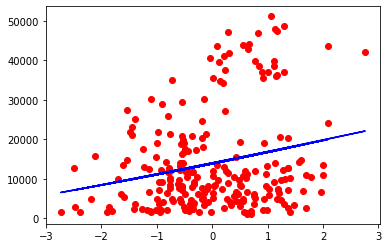

In [66]:
poly_reg = PolynomialFeatures(degree =2)
X_poly = poly_reg.fit_transform(X_train['bmi'].to_numpy().reshape(-1,1))
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
preds = pol_reg.predict(poly_reg.fit_transform(X_train['bmi'].to_numpy().reshape(-1,1)))
plt.scatter(X_train['bmi'],y_train, color = 'red')
plt.plot(X_train['bmi'],preds, color='blue')
for i in pol_reg.coef_: print(i)
print("MAE", mean_absolute_error(y_train, preds))
print("MSE", mean_squared_error(y_train, preds))

## Todas las variables 

In [70]:
poly_reg = PolynomialFeatures(degree =2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
preds = pol_reg.predict(poly_reg.fit_transform(X_train))
print("Coeficientes:")
for i in pol_reg.coef_: print(i)
print("MAE", mean_absolute_error(y_train, preds))
print("MSE", mean_squared_error(y_train, preds))

Coeficientes:
-1001505917874.8969
4119.988124463484
93047012916626.34
1268.672126598615
662.3334377156843
-259655659409843.25
-253.9316845725675
734.5720430688415
113.98046818167431
90.67684087302717
-127.79093824592526
346.62858885150604
763.1116701915317
832545507297822.4
-55.71526362657822
-43.3221945931964
416.73176375202917
1.812619563755561
-199.3405280544132
-223.13089940762944
3850.88977822726
-17.077448850817735
102.08020430879823
-402.50000301828527
-363.2013722697618
186748318004910.2
372.6281002989723
219.3076153245172
MAE 2998.548786309013
MSE 22742762.373181503
